# Project 3 - Titanic Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# checking for missing values percentage
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [18]:
# Treating the missing values
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [19]:
# as Cabin column has 77 percent missing data so i am dropping this columns 
df.drop(columns=['Cabin'],axis=1,inplace=True)

In [34]:
# Embarked column has only 0.2 % missing values so we can fill with mode here
df['Embarked'].fillna(df.Embarked.mode()[0],inplace=True)

In [36]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [50]:
# dropping unnecessary columns
new_df = df.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [51]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
# checking number of numeric columns and categorical columns

In [52]:
num_cols = new_df.select_dtypes(include=np.number)
cat_cols = new_df.select_dtypes(exclude=np.number)

In [53]:
num_cols.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [54]:
cat_cols.columns

Index(['Sex', 'Embarked'], dtype='object')

# Visualising all the columns 

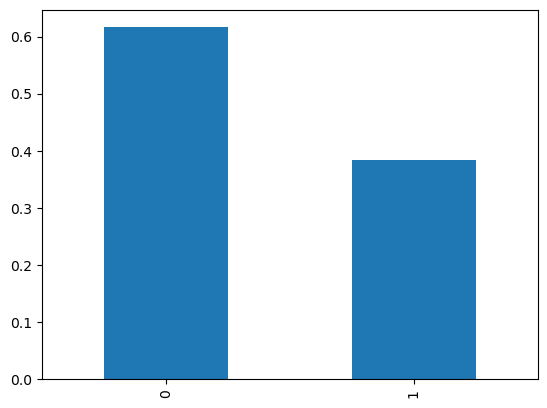

In [60]:
# cheking target column distribution
df.Survived.value_counts(normalize=True).plot(kind='bar')
plt.show()

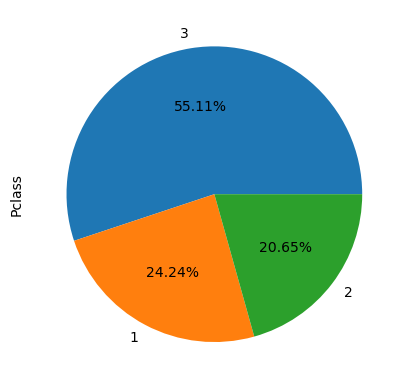

In [62]:
df.Pclass.value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.show()

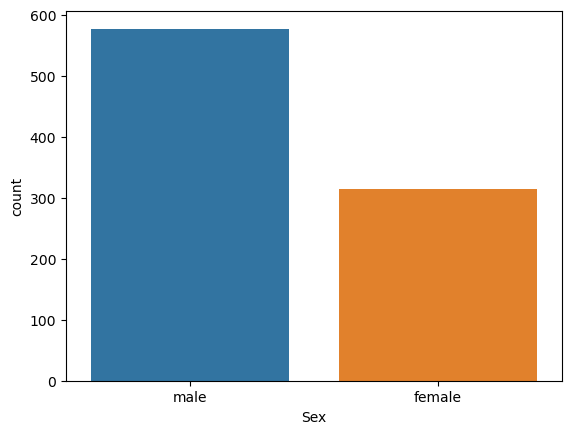

In [65]:
# Sex Columns
sns.countplot(x=df.Sex)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

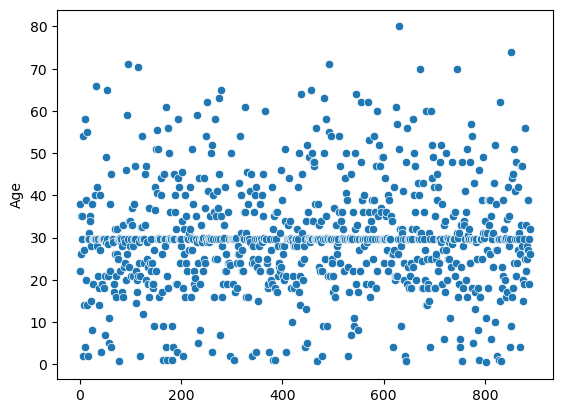

In [69]:
#Age column
sns.scatterplot(df.Age)
plt.show

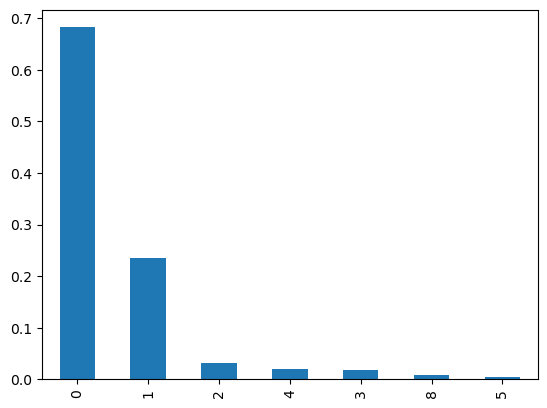

In [71]:
#Sibsp
df.SibSp.value_counts(normalize=True).plot(kind='bar')
plt.show()

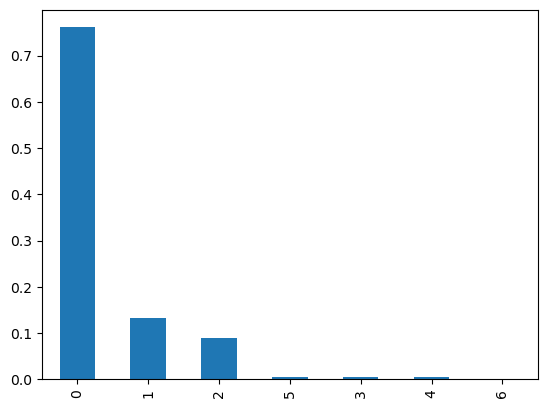

In [70]:
#parch
df.Parch.value_counts(normalize=True).plot(kind='bar')
plt.show()

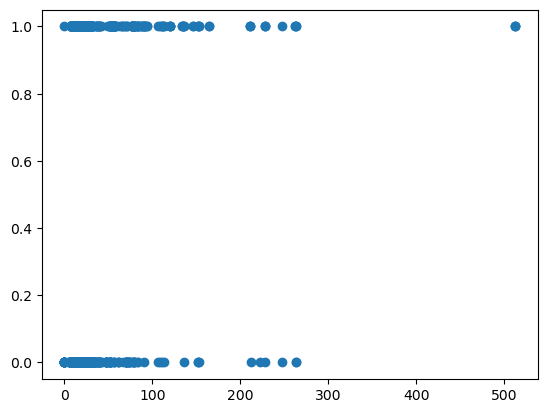

In [73]:
# cheking fare with target column
plt.scatter(df.Fare,df.Survived)
plt.show()

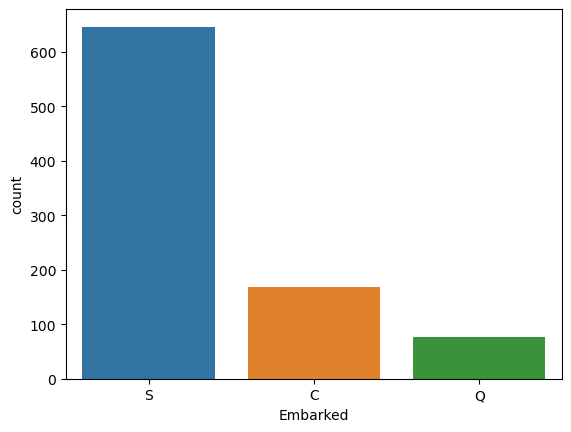

In [78]:
#Embarked
sns.countplot(data=df,x='Embarked')
plt.show()

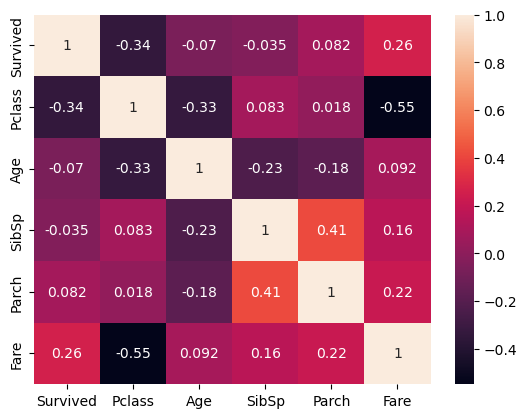

In [79]:
# all the numcols together
sns.heatmap(num_cols.corr(),annot=True)
plt.show()

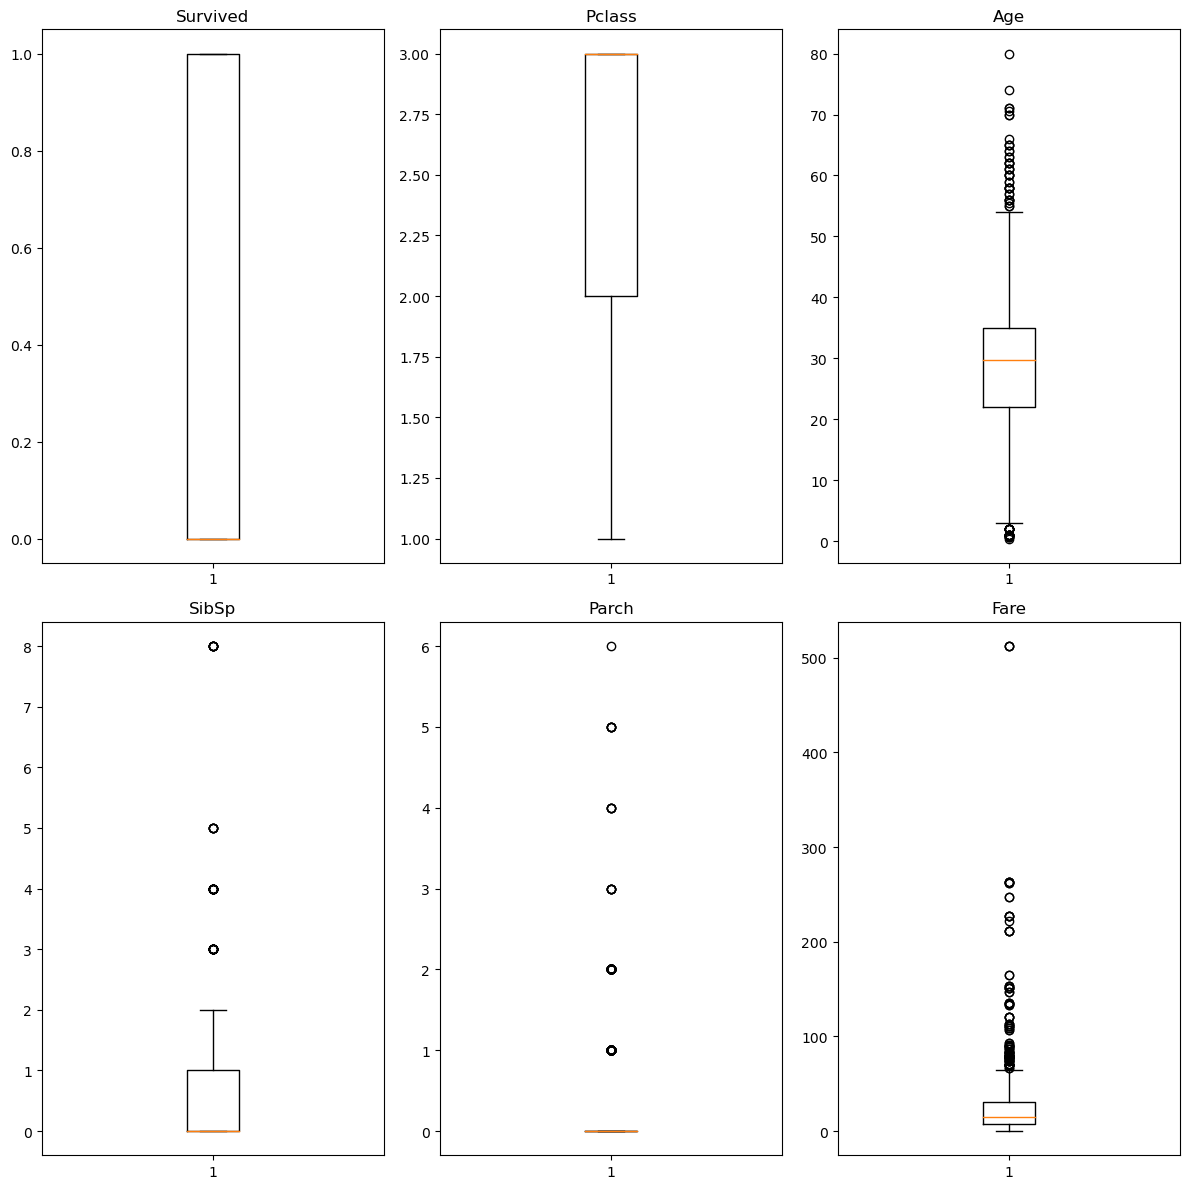

In [81]:
# Checking for outliers
plt.figure(figsize=(12,12))
t=1
for i in num_cols:
    plt.subplot(2,3,t)
    plt.boxplot(new_df[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

In [82]:
# As age and Fare can have outliers and removing them cam cause negative effect on prediction so not removing them.

In [83]:
# Encoding categorical columns
cat_cols

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [86]:
final_df = pd.get_dummies(new_df,drop_first=True)
final_df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [89]:
x = final_df.drop(columns=['Survived'])
y=final_df.Survived

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,f1_score

In [92]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [97]:
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [98]:
pred = logreg.predict(xtest)

In [103]:
print(classification_report(ytest,pred))
print('F1 score of the model is :',f1_score(ytest,pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       106
           1       0.71      0.70      0.70        73

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179

F1 score of the model is : 0.703448275862069


# using other powerful model

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [105]:
def model(model,xtrain,xtest,ytrain,ytest):
    m = model()
    pred = m.fit(xtrain,ytrain).predict(xtest)
    print(classification_report(ytest,pred))
    print('F1 score of the model is ;',f1_score(ytest,pred))
    

In [106]:
# Descsion Tree
model(DecisionTreeClassifier,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       106
           1       0.75      0.66      0.70        73

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179

F1 score of the model is ; 0.7007299270072993


In [107]:
# Random Forest
model(RandomForestClassifier,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       106
           1       0.79      0.67      0.73        73

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

F1 score of the model is ; 0.725925925925926


In [108]:
# Adaboost
model(AdaBoostClassifier,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       106
           1       0.78      0.78      0.78        73

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

F1 score of the model is ; 0.7808219178082192


In [109]:
# gradient boosting 
model(GradientBoostingClassifier,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       106
           1       0.83      0.68      0.75        73

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

F1 score of the model is ; 0.7518796992481204


In [110]:
# Xtream gradient boosting 
model(XGBClassifier,xtrain,xtest,ytrain,ytest)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       106
           1       0.79      0.68      0.74        73

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

F1 score of the model is ; 0.7352941176470589


In [ ]:
# here taking Adaboost as my final model and doing hyperparamet tuning


In [113]:
params = {'n_estimators':[i for i in range(50,200,10)],'learning_rate':[0.1,0.2,0.5,0.7,0.9,1.0]}
gscv = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=params,cv=3,verbose=2,scoring='f1')

In [114]:
gscv.fit(xtrain,ytrain)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=60; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=60; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=60; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=70; total time=   0.2s
[CV] END .................learning_rate=0.1, n_estimators=70; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=70; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=80; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=80; total time=   0.1s
[CV] END .................learning_rate=0.1, n_

[CV] END .................learning_rate=0.5, n_estimators=80; total time=   0.1s
[CV] END .................learning_rate=0.5, n_estimators=90; total time=   0.2s
[CV] END .................learning_rate=0.5, n_estimators=90; total time=   0.2s
[CV] END .................learning_rate=0.5, n_estimators=90; total time=   0.2s
[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.2s
[CV] END ................learning_rate=0.5, n_estimators=110; total time=   0.2s
[CV] END ................learning_rate=0.5, n_estimators=110; total time=   0.2s
[CV] END ................learning_rate=0.5, n_estimators=110; total time=   0.2s
[CV] END ................learning_rate=0.5, n_estimators=120; total time=   0.2s
[CV] END ................learning_rate=0.5, n_estimators=120; total time=   0.2s
[CV] END ................lea

[CV] END ................learning_rate=0.9, n_estimators=120; total time=   0.2s
[CV] END ................learning_rate=0.9, n_estimators=130; total time=   0.2s
[CV] END ................learning_rate=0.9, n_estimators=130; total time=   0.3s
[CV] END ................learning_rate=0.9, n_estimators=130; total time=   0.2s
[CV] END ................learning_rate=0.9, n_estimators=140; total time=   0.3s
[CV] END ................learning_rate=0.9, n_estimators=140; total time=   0.3s
[CV] END ................learning_rate=0.9, n_estimators=140; total time=   0.3s
[CV] END ................learning_rate=0.9, n_estimators=150; total time=   0.3s
[CV] END ................learning_rate=0.9, n_estimators=150; total time=   0.3s
[CV] END ................learning_rate=0.9, n_estimators=150; total time=   0.3s
[CV] END ................learning_rate=0.9, n_estimators=160; total time=   0.3s
[CV] END ................learning_rate=0.9, n_estimators=160; total time=   0.3s
[CV] END ................lea

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 0.7, 0.9, 1.0],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140, 150, 160, 170, 180, 190]},
             scoring='f1', verbose=2)

In [116]:
best = gscv.best_params_
best

{'learning_rate': 0.7, 'n_estimators': 50}

In [117]:
ada = AdaBoostClassifier(**best)

In [118]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.7)

In [120]:
pred = ada.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       106
           1       0.79      0.75      0.77        73

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.81       179

